## Loading Libraries

In [1]:
from skimage.filters import gabor
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from utils.DatasetHelper import *
from utils.ModelHelper import *
from utils.PlotHelper import *

## Dataset Paths

In [3]:
def prepare_X_y_histogran_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted_histogram_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

In [4]:
X_h_e,y_h_e = prepare_X_y_histogran_equalized()
X_e_b,y_e_b = prepare_X_y_edge_boosted()
X_e_b_h_e,y_e_b_h_e = prepare_X_y_edge_boosted_histogram_equalized()
X,y = prepare_X_y()


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('normal images')
    plt.imshow(X[i].reshape(48, 48), cmap=plt.get_cmap('gray'))

In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized images')
    plt.imshow(X_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


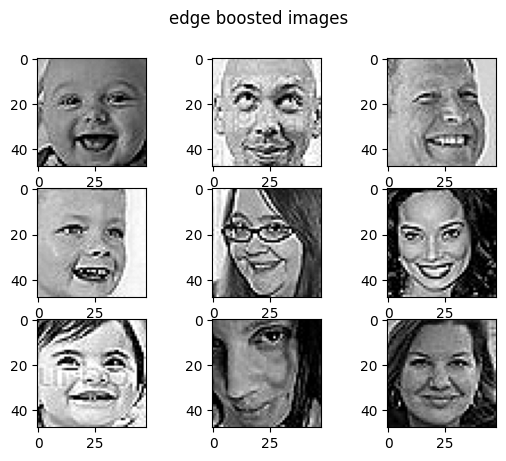

In [9]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('edge boosted images')
    plt.imshow(X_e_b[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


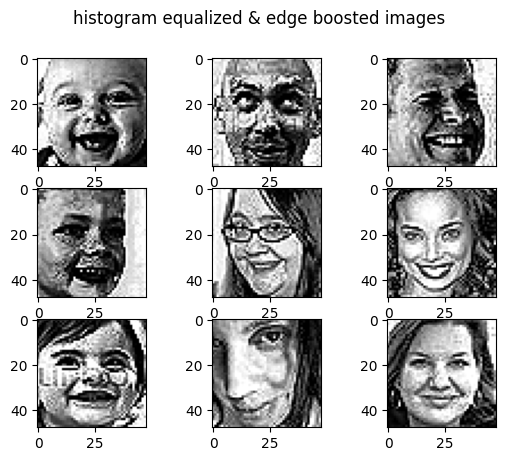

In [5]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized & edge boosted images')
    plt.imshow(X_e_b_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


In [11]:
X_gabor_lda_e_b = apply_gabor_and_pca(X_e_b,y_e_b)

X_train, X_test, y_train, y_test = train_test_split(X_gabor_lda_e_b, y_e_b, test_size=0.2, random_state=42)

y_pred_euclidian = predict_with_euclidean_distance(X_train, y_train, X_test)

X_Test lenght:  7178
% 1.3931457230426303
% 2.7862914460852606
% 4.17943716912789
% 5.572582892170521
% 6.965728615213152
% 8.35887433825578
% 9.752020061298412
% 11.145165784341042
% 12.538311507383673
% 13.931457230426304
% 15.324602953468933
% 16.71774867651156
% 18.11089439955419
% 19.504040122596823
% 20.897185845639456
% 22.290331568682085
% 23.683477291724714
% 25.076623014767346
% 26.46976873780997
% 27.862914460852608
% 29.256060183895233
% 30.649205906937866
% 32.042351629980494
% 33.43549735302312
% 34.82864307606576
% 36.22178879910838
% 37.61493452215102
% 39.008080245193646
% 40.401225968236275
% 41.79437169127891
% 43.18751741432153
% 44.58066313736417
% 45.9738088604068
% 47.36695458344943
% 48.76010030649206
% 50.15324602953469
% 51.546391752577314
% 52.93953747561994
% 54.33268319866258
% 55.725828921705215
% 57.118974644747844
% 58.512120367790466
% 59.905266090833095
% 61.29841181387573
% 62.69155753691836
% 64.08470325996099
% 65.47784898300361
% 66.87099470604625


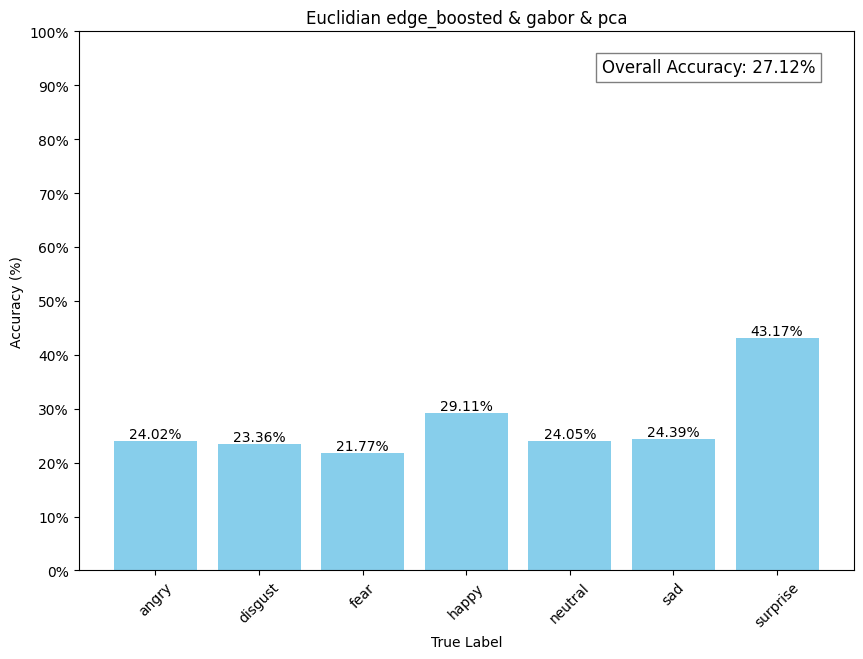

In [12]:
plot_label_accuracies(y_test, y_pred_euclidian, "Euclidian edge_boosted & gabor & pca")

## Try This Too

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.filters import gabor_kernel
from scipy.ndimage import convolve

# Örnek bir Gabor filtresi fonksiyonu
def apply_gabor_filter(image, kernel):
    return convolve(image, kernel.real) + convolve(image, kernel.imag)

# Gabor özelliklerini hesaplayan fonksiyon
def extract_gabor_features(image, kernels):
    img_reshaped = image.reshape(48, 48)
    features = []
    for kernel in kernels:
        filtered = apply_gabor_filter(img_reshaped, kernel)
        features.append(filtered.mean())
        features.append(filtered.var())
    return features

# Gabor çekirdeklerini (kernels) oluşturma
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
            kernels.append(kernel)

# Yüz veri setinizi yükleyin ve önişleme yapın
# Burada varsayılan olarak 'X' ve 'y' değişkenleriniz olduğunu varsayıyorum
# X: Görüntülerin bulunduğu numpy dizisi, y: Etiketlerin bulunduğu numpy dizisi
X, y = load_images_from_folder_fer_2013(test_folder)

# Gabor özelliklerini kullanarak özellik setini hazırlama
X_gabor = np.array([extract_gabor_features(image, kernels) for image in X])

# Veri setini eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X_gabor, y, test_size=0.25, random_state=42)

# SVM sınıflandırıcısını eğitme
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = svm_classifier.predict(X_test)

# Tahmin başarımını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f'Test seti üzerindeki doğruluk: {accuracy:.2f}')




In [ ]:
plot_label_accuracies(y_test, y_pred, 'Gabor Features + SVM')

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.filters import gabor_kernel
from scipy.ndimage import convolve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Örnek bir Gabor filtresi fonksiyonu
def apply_gabor_filter(image, kernel):
    return convolve(image, kernel.real) + convolve(image, kernel.imag)

# Gabor özelliklerini hesaplayan fonksiyon
def extract_gabor_features(image, kernels):
    img_reshaped = image.reshape(48, 48)
    features = []
    for kernel in kernels:
        filtered = apply_gabor_filter(img_reshaped, kernel)
        features.append(filtered.mean())
        features.append(filtered.var())
    return features

# Gabor çekirdeklerini (kernels) oluşturma
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
            kernels.append(kernel)

# Yüz veri setinizi yükleyin ve önişleme yapın
# Burada varsayılan olarak 'X' ve 'y' değişkenleriniz olduğunu varsayıyorum
# X: Görüntülerin bulunduğu numpy dizisi, y: Etiketlerin bulunduğu numpy dizisi
X, y = load_images_from_folder_fer_2013(train_folder)
X_test, y_test = load_images_from_folder_fer_2013(test_folder)

X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))

# Gabor özelliklerini kullanarak özellik setini hazırlama
X_gabor = np.array([extract_gabor_features(image, kernels) for image in X])

pca = PCA(n_components=0.95)  # %95 varyansı koruyacak şekilde boyut azaltma
X_pca = pca.fit_transform(X_gabor)

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)






In [ ]:
# Tahmin başarımını değerlendirme
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Test seti üzerindeki doğruluk: {accuracy:.2f}')
plot_label_accuracies(y_test, y_pred_knn, 'Gabor Features + KNN')

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.filters import gabor_kernel
from scipy.ndimage import convolve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Örnek bir Gabor filtresi fonksiyonu
def apply_gabor_filter(image, kernel):
    return convolve(image, kernel.real) + convolve(image, kernel.imag)

# Gabor özelliklerini hesaplayan fonksiyon
def extract_gabor_features(image, kernels):
    img_reshaped = image.reshape(48, 48)
    features = []
    for kernel in kernels:
        filtered = apply_gabor_filter(img_reshaped, kernel)
        features.append(filtered.mean())
        features.append(filtered.var())
    return features

# Gabor çekirdeklerini (kernels) oluşturma
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
            kernels.append(kernel)

# Yüz veri setinizi yükleyin ve önişleme yapın
# Burada varsayılan olarak 'X' ve 'y' değişkenleriniz olduğunu varsayıyorum
# X: Görüntülerin bulunduğu numpy dizisi, y: Etiketlerin bulunduğu numpy dizisi
X, y = load_images_from_folder_fer_2013(train_folder)
X_test, y_test = load_images_from_folder_fer_2013(test_folder)

X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))

# Gabor özelliklerini kullanarak özellik setini hazırlama
X_gabor = np.array([extract_gabor_features(image, kernels) for image in X])

# pca = PCA(n_components=0.95)  # %95 varyansı koruyacak şekilde boyut azaltma
# X_pca = pca.fit_transform(X_gabor)
lda = LDA()  # LDA nesnesi oluşturulur, varsayılan olarak tüm bileşenleri kullanır
X_lda = lda.fit_transform(X_gabor, y)  # LDA, hem fit hem de transform işlemini yapar

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.25, random_state=42)

# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)






In [ ]:
plot_label_accuracies(y_test, y_pred_knn, 'Gabor Features + LDA + KNN')

------

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # SVM modelini oluştur ve eğit
    svm_clf = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF kerneli ile SVM
    svm_clf.fit(X_train, y_train)
    
    y_pred_train = svm_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Eğitim seti üzerindeki doğruluk oranı: {train_accuracy:.4f}")
    
    y_pred_test = svm_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test seti üzerindeki doğruluk oranı: {test_accuracy:.4f}")

X_test_feature_small, y_test_small = prepare_small_test_set(X_test_features, y_test)

train_and_evaluate_svm(X_train_features, y_train, X_test_feature_small, y_test)


In [ ]:
from sklearn.feature_extraction import image

def patch_based_gabor_filter():
    # Use the array data from the first image in this dataset:
    one_image = cv2.imread(f"{train_folder}/angry/0.jpg")
    print('Image shape: {}'.format(one_image.shape))
    patches = image.extract_patches_2d(one_image, (24, 24), max_patches=25, random_state=0)
    print('Patches shape: {}'.format(patches.shape))
    # Here are just two of these patches:


    #plot all patches
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for i in range(5):
        for j in range(5):
            ax[i, j].imshow(patches[i * 5 + j], cmap='gray')
            ax[i, j].axis('off')
    plt.show()

patch_based_gabor_filter()
   

# Gabor filtresini patch şeklinde uygulanmış öznitelikleri çıkar
def extract_features_gabor_patch(img, kernel_size=3, sigma=1, theta=0, lambda_=1, gamma=0.3, psi=0):
    # Gabor filtresi uygulanır
    filtered_img, _ = gabor(img, frequency=lambda_, theta=theta, sigma_x=sigma, sigma_y=sigma, n_stds=kernel_size, offset=psi)
    # Filtrelenmiş görüntünün mutlak değeri alınır
    filtered_img = np.abs(filtered_img)
    
    # Patchler üzerinde öznitelik çıkar
    patches = image.extract_patches_2d(filtered_img, (24, 24), max_patches=25, random_state=0)
    patch_features = np.mean(patches, axis=(1, 2))
    
    # Patchlerin ortalamasını öznitelik vektörü olarak döndür
    return patch_features



In [ ]:
import numpy as np
from skimage import io
from sklearn.feature_extraction import image

def extract_patches(img, patch_size, max_patches=None):
    """
    img: tek bir yüz görüntüsü, 48x48 piksel
    patch_size: çıkarılacak patch'in boyutu, örneğin (24, 24)
    max_patches: çıkarılacak maksimum patch sayısı, örneğin 100
    """
    patches = image.extract_patches_2d(img, patch_size, max_patches=max_patches)
    return patches

def process_image_set(X, patch_size=(24, 24), max_patches=100):
    """
    X: FER2013 görüntü seti, her bir görüntü 48x48 piksel
    patch_size: çıkarılacak patch'in boyutu
    max_patches: her görüntü için çıkarılacak maksimum patch sayısı
    """
    # Tüm görüntüler için patch'leri çıkar
    all_patches = [extract_patches(img.reshape(48, 48), patch_size, max_patches) for img in X]
    return np.array(all_patches)

# Örnek kullanım:
# X burada FER2013 veri setinden yüklenen görüntüleri temsil ediyor.
# X'i numpy array olarak yüklediğinizi varsayıyorum.
# Örnek bir görüntü seti için patch çıkarma işlemi
patches = process_image_set(X_train, patch_size=(24, 24), max_patches=100)

# Sonraki adımlar: Bu patch'leri kullanarak özellik çıkarma, eğitim ve sınıflandırma yapabilirsiniz.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_gabor_features(image, patch_size=(24, 24), max_patches=50):
    # Gabor özniteliklerini çıkarmak için bir fonksiyon
    patches = extract_patches_2d(image, patch_size, max_patches=max_patches)
    features = []
    for patch in patches:
        filt_real, filt_imag = gabor(patch, frequency=0.6)
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10):
    # Her bir duygu için en önemli patch'leri bulmak için bir fonksiyon
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        # O duygu için tüm görüntüleri al
        emotion_images = X[y == emotion]
        
        # Tüm görüntülerden patch'leri çıkar ve öznitelikleri hesapla
        all_features = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            features = extract_gabor_features(img)
            all_features.append(features)
        
        # Tüm öznitelikleri birleştir
        all_features = np.vstack(all_features)
        
        # PCA ile boyut indirgeme
        pca = PCA(n_components=0.95)  # Varyansın %95'ini koru
        reduced_features = pca.fit_transform(all_features)
        
        # KMeans ile kümeleme
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        # En önemli patch'leri bul
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_features[important_patch_idx])
            
    return important_patches

# Veri seti yükleme ve ön işleme
# X, y = load_dataset(...) # Veri setinizi yükleyin ve X, y şeklinde ayırın

# Önemli

important_patches = find_important_patches(X_train, y_train)

In [ ]:
important_patches
# Önemli patch'leri görselleştir
fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i, patch in enumerate(important_patches['happy']):
    ax[i].imshow(patch.reshape(24, 24), cmap='gray')
    ax[i].axis('off')
plt.show()

# Patchleri train datasetinden örnek birkaç görüntüde denk geldiği noktaya göre görselleştir
fig, ax = plt.subplots(3, 10, figsize=(20, 20))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_gabor_features(image, patch_size=(8, 8), max_patches=4):
    # Gabor özniteliklerini çıkarmak için bir fonksiyon
    patches = extract_patches_2d(image, patch_size, max_patches=max_patches)
    
    features = []
    for patch in patches:

        filt_real, filt_imag = gabor(patch, frequency=0.6)
        # features.append(np.abs(patch).flatten())
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10, patch_size = (8,8)):
    # Her bir duygu için en önemli patch'leri bulmak için bir fonksiyon
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        # O duygu için tüm görüntüleri al
        emotion_images = X[y == emotion]

        # Tüm görüntülerden patch'leri çıkar ve öznitelikleri hesapla
        all_features = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            features = extract_gabor_features(img, patch_size=patch_size)
            all_features.append(features)

            # #plot the filtered images
            # fig, ax = plt.subplots(1, 4, figsize=(20, 20))
            # for i, patch in enumerate(features):
            #     ax[i].imshow(patch.reshape(patch_size[0], patch_size[1]), cmap='gray')
            #     ax[i].axis('off')
            # plt.show()
        
        # Tüm öznitelikleri birleştir
        all_features = np.vstack(all_features)
        # print(all_features)
        # PCA ile boyut indirgeme
        pca = PCA(n_components=5)
        reduced_features = pca.fit_transform(all_features)
        
        # KMeans ile kümeleme
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        # En önemli patch'leri bul
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            print(important_patch_idx)
            important_patches[emotion].append(all_features[important_patch_idx])
        all_patches[emotion] = all_features
            
    return all_patches, important_patches 

patch_size = (16,16)
all_patches, important_patches = find_important_patches(X_train, y_train, patch_size=patch_size)





In [ ]:
# Önemli patch'leri görselleştir
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i, patch in enumerate(important_patches['happy']):
    ax[i].imshow(patch.reshape(patch_size[0], patch_size[1]), cmap='gray')
    ax[i].axis('off')
plt.show()

In [ ]:
from matplotlib import patches

# def visualize_patches(image, patchess, patch_size=(24, 24)):
#     """
#     image: Orijinal görüntü
#     patches: Görselleştirmek istediğiniz patch'lerin listesi (patch'lerin konumları)
#     patch_size: Her bir patch'in boyutu
#     """
#     fig, ax = plt.subplots(1)
#     ax.imshow(image, cmap='gray')

#     for patch in patchess:
#         # print(patch)
#         y, x = divmod(image.shape[1], patch)
#         # print(y,x)

#     for i in range(len(x)):
#         rect = patches.Rectangle((x[i], y[i]), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)

#     plt.show()

X_train_angry = X_train[y_train == 'angry']
X_train_happy = X_train[y_train == 'happy']


def visualize_patches(image, patch_positions, patch_size=(24, 24)):
    """
    image: Original image.
    patch_positions: List of tuples indicating the top-left corner positions of patches to visualize.
    patch_size: The size of each patch.
    """
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    for position in patch_positions:
        print(position)
        (y, x) = position  # Assuming position is a tuple (y, x)
        rect = patches.Rectangle((x, y), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()



visualize_patches(X_train_angry[3].reshape(48, 48), important_patches['happy'], patch_size=patch_size)

MY OWN PATCH FUN


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_patches_with_positions(image, patch_size=(8, 8), max_patches=None):
    patches = []
    positions = []
    h, w = image.shape
    for y in range(0, h - patch_size[0] + 1, patch_size[0]):
        for x in range(0, w - patch_size[1] + 1, patch_size[1]):
            patch = image[y:y+patch_size[0], x:x+patch_size[1]]
            patches.append(patch)
            positions.append((y, x))
            if max_patches and len(patches) >= max_patches:
                break
        if max_patches and len(patches) >= max_patches:
                break
    return patches, positions

def extract_gabor_features(patches):
    features = []
    for patch in patches:
        filt_real, filt_imag = gabor(patch, frequency=0.6)
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10, patch_size=(8,8)):
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        emotion_images = X[y == emotion]

        all_features = []
        all_positions = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            patches, positions = extract_patches_with_positions(img, patch_size=patch_size)
            features = extract_gabor_features(patches)
            all_features.extend(features)
            all_positions.extend(positions)

        all_features = np.array(all_features)
        
        pca = PCA(n_components=10)
        reduced_features = pca.fit_transform(all_features)
        
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_positions[important_patch_idx])
            all_patches[emotion].append(all_features[important_patch_idx])

    return all_patches, important_patches


In [ ]:
X_train_angry = X_train[y_train == 'angry']
X_train_happy = X_train[y_train == 'happy']

def visualize_patches(image, patch_positions, patch_size=(24, 24)):
    """
    image: Original image.
    patch_positions: List of tuples indicating the top-left corner positions of patches to visualize.
    patch_size: The size of each patch.
    """
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    for position in patch_positions:
        print(position)
        (y, x) = position  # Assuming position is a tuple (y, x)
        rect = patches.Rectangle((x, y), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()



visualize_patches(X_train_angry[0].reshape(48, 48), important_patches['angry'], patch_size=patch_size)

In [ ]:
important_patch_coordinates = [features for features in important_patches.values() if len(features) > 0]
important_patch_labels = [emotion for emotion, features in important_patches.items() if len(features) > 0]

def visualize_image_on_specific_patches(image, patch_positions, patch_size=(24, 24)):
    # İlk olarak, beyaz bir arka plan oluştur
    white_background = np.ones_like(image) * 255
    
    # Şimdi, her bir yama pozisyonu için, ilgili görüntü bölümünü beyaz arka plan üzerine kopyala
    for position in patch_positions:
        y, x = position
        white_background[y:y+patch_size[1], x:x+patch_size[0]] = image[y:y+patch_size[1], x:x+patch_size[0]]
    
    # Sonuç görüntüyü göster
    plt.imshow(white_background, cmap='gray')
    plt.axis('off') # Eksenleri gizle
    plt.show()
    
visualize_image_on_specific_patches(X_train_angry[0].reshape(48, 48), important_patch_coordinates[0], patch_size=patch_size)

In [ ]:
def find_important_patches_without_gabor(X, y, patch_size=(8,8)):
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        emotion_images = X[y == emotion]

        all_features = []
        all_positions = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            patches, positions = extract_patches_with_positions(img, patch_size=patch_size)
            patches = np.array(patches)
            patches = patches.reshape(patches.shape[0], -1)  # Reshape patches to 2D
            all_features.extend(patches)
            all_positions.extend(positions)

        all_features = np.array(all_features)
        
        pca = PCA(n_components=10)
        reduced_features = pca.fit_transform(all_features)
        
        kmeans = KMeans(n_clusters=10)
        kmeans.fit(reduced_features)
        
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_positions[important_patch_idx])
            all_patches[emotion].append(all_features[important_patch_idx])

    return all_patches, important_patches

In [ ]:
patch_size = (4,4)
# all_patches, important_patches = find_important_patches(X_train, y_train, patch_size=patch_size)

all_patches_without_gabor, important_patches_without_gabor = find_important_patches_without_gabor(X_train, y_train, patch_size=patch_size)

In [ ]:
important_patches_without_gabor['angry']

visualize_image_on_specific_patches(X_train_angry[0].reshape(48, 48), important_patches_without_gabor['happy'], patch_size=patch_size)

In [ ]:
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d

def calculate_average_patch(images, patch_size=(8, 8)):
    """Her koordinat için patch'lerin ortalamasını hesaplar."""
    # Görüntü boyutlarına ve patch boyutuna bağlı olarak tüm patch'lerin toplamını ve sayısını saklayacak yapı
    patch_sums = np.zeros((images[0].shape[0] - patch_size[0] + 1, images[0].shape[1] - patch_size[1] + 1, patch_size[0], patch_size[1]))
    patch_counts = np.zeros(patch_sums.shape[:2])
    
    # Tüm görüntüler için patch'leri çıkar ve topla
    for image in images:
        patches = extract_patches_2d(image, patch_size)
        for i in range(patches.shape[0]):
            y, x = i // patch_counts.shape[1], i % patch_counts.shape[1]  # Patch'in koordinatını hesapla
            patch_sums[y, x] += patches[i]
            patch_counts[y, x] += 1
    
    # Ortalama patch'leri hesapla
    average_patches = patch_sums / patch_counts[:,:,None,None]
    
    return average_patches

def find_most_similar_patches(images, average_patches, patch_size=(8, 8)):
    """Her koordinat için ortalama patch'e en çok benzeyen patch'i bulur."""
    similar_patches_coordinates = []
    for y in range(average_patches.shape[0]):
        for x in range(average_patches.shape[1]):
            min_distance = np.inf
            min_idx = None
            for idx, image in enumerate(images):
                patch = extract_patches_2d(image[y:y+patch_size[0], x:x+patch_size[1]], patch_size)
                distance = np.linalg.norm(patch - average_patches[y, x])
                if distance < min_distance:
                    min_distance = distance
                    min_idx = (idx, y, x)
            similar_patches_coordinates.append(min_idx)
    
    return similar_patches_coordinates

# Örnek kullanım
images = X_train_angry[:10]  # Bu, numpy array'leri olan görüntü listesi olmalı
patch_size = (8, 8)
average_patches = calculate_average_patch(images, patch_size)
similar_patches = find_most_similar_patches(images, average_patches=average_patches, patch_size=patch_size)
